In [125]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

In [82]:
patrols = gpd.read_file(r"C:\Users\gmwil\Desktop\GIS MEMPHIS\ADVANCED GIS\Cop Project\PoliceData.gdb", layer='PatrolZones')

In [83]:
incidents = gpd.read_file(r"C:\Users\gmwil\Desktop\GIS MEMPHIS\ADVANCED GIS\Cop Project\PoliceData.gdb", layer='GraffitiIncidents')

<AxesSubplot:>

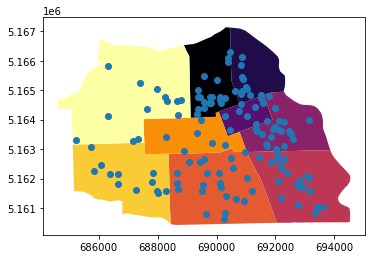

In [84]:
fig, ax = plt.subplots(1)
patrols.plot(cmap="inferno", ax=ax)
incidents.plot(ax=ax)

In [85]:
patrols.head()

,INCIDENTS,PRIORITY,NAME,POPULATION,SHAPE_Length,SHAPE_Area,geometry
0,0,None,North Central,6477,8777.033636,3.880494e+06,"MULTIPOLYGON (((690464.047 5167124.472, 690468..."
1,0,None,Northeast,5601,7440.428177,3.293690e+06,"MULTIPOLYGON (((691594.121 5164834.759, 690795..."
2,0,None,Downtown,2833,5013.924984,1.432936e+06,"MULTIPOLYGON (((690779.654 5163584.137, 690384..."
3,0,None,Eastside,7790,9206.485855,4.038758e+06,"MULTIPOLYGON (((693865.461 5162964.666, 693072..."
4,0,None,Southeast,4998,10966.221591,6.668385e+06,"MULTIPOLYGON (((691359.668 5162227.932, 691275..."


In [86]:
incidents.head()

,COMMENTS,geometry
0,None,POINT (690453.853 5166304.333)
1,None,POINT (690402.500 5166098.921)
2,Back wall of commercial business,POINT (690373.156 5165959.534)
3,None,POINT (690820.660 5165842.156)
4,None,POINT (690872.013 5166117.261)


In [93]:
incidents_within_zones = gpd.sjoin(incidents, patrols, how = "inner", predicate = "within")

In [97]:
incidents_within_zones.NAME.value_counts()

South Central    23
North Central    21
Southeast        21
Eastside         20
Northwest        13
Southwest        12
Northeast        10
Downtown         10
Central           6
Name: NAME, dtype: int64

In [94]:
incidents_within_zones

,COMMENTS,geometry,index_right,INCIDENTS,PRIORITY,NAME,POPULATION,SHAPE_Length,SHAPE_Area
0,None,POINT (690453.853 5166304.333),0,0,None,North Central,6477,8777.033636,3.880494e+06
1,None,POINT (690402.500 5166098.921),0,0,None,North Central,6477,8777.033636,3.880494e+06
2,Back wall of commercial business,POINT (690373.156 5165959.534),0,0,None,North Central,6477,8777.033636,3.880494e+06
9,None,POINT (690611.580 5164983.828),0,0,None,North Central,6477,8777.033636,3.880494e+06
11,None,POINT (690296.126 5164723.395),0,0,None,North Central,6477,8777.033636,3.880494e+06
...,...,...,...,...,...,...,...,...,...
115,Obscene,POINT (686081.516 5162474.870),7,0,None,Southwest,10224,11495.243750,6.681488e+06
116,None,POINT (685733.050 5163080.101),7,0,None,Southwest,10224,11495.243750,6.681488e+06
118,None,POINT (685835.755 5162247.449),7,0,None,Southwest,10224,11495.243750,6.681488e+06
121,None,POINT (687999.916 5161510.168),7,0,None,Southwest,10224,11495.243750,6.681488e+06


In [123]:
SCfilt = (incidents_within_zones["NAME"] == "South Central")
incidents_within_zones.loc[SCfilt, "INCIDENTS"] = "23"
NCfilt = (incidents_within_zones["NAME"] == "North Central")
incidents_within_zones.loc[NCfilt, "INCIDENTS"] = "21"
SEfilt = (incidents_within_zones["NAME"] == "Southeast")
incidents_within_zones.loc[SEfilt, "INCIDENTS"] = "21"
Eastfilt = (incidents_within_zones["NAME"] == "Eastside")
incidents_within_zones.loc[Eastfilt, "INCIDENTS"] = "20"
NWfilt = (incidents_within_zones["NAME"] == "Northwest")
incidents_within_zones.loc[NWfilt, "INCIDENTS"] = "13"
SWfilt = (incidents_within_zones["NAME"] == "Southwest")
incidents_within_zones.loc[SWfilt, "INCIDENTS"] = "12"
NEfilt = (incidents_within_zones["NAME"] == "Northeast")
incidents_within_zones.loc[NEfilt, "INCIDENTS"] = "10"
DTfilt = (incidents_within_zones["NAME"] == "Downtown")
incidents_within_zones.loc[DTfilt, "INCIDENTS"] = "10"
Cfilt = (incidents_within_zones["NAME"] == "Central")
incidents_within_zones.loc[Cfilt, "INCIDENTS"] = "6"

In [ ]:
pd.set_option("display.max_rows", 136)

In [128]:
incidents_within_zones[["NAME","INCIDENTS","PRIORITY","SHAPE_Area"]]

,NAME,INCIDENTS,PRIORITY,SHAPE_Area
0,North Central,21,None,3.880494e+06
1,North Central,21,None,3.880494e+06
2,North Central,21,None,3.880494e+06
9,North Central,21,None,3.880494e+06
11,North Central,21,None,3.880494e+06
12,North Central,21,None,3.880494e+06
78,North Central,21,None,3.880494e+06
79,North Central,21,None,3.880494e+06
80,North Central,21,None,3.880494e+06
81,North Central,21,None,3.880494e+06


In [136]:
incidents_within_zones["sq_mile"] = incidents_within_zones["SHAPE_Area"]/2589988.11

In [137]:
incidents_within_zones[["NAME","INCIDENTS","PRIORITY","sq_mile"]]

,NAME,INCIDENTS,PRIORITY,sq_mile
0,North Central,21,None,1.498267
1,North Central,21,None,1.498267
2,North Central,21,None,1.498267
9,North Central,21,None,1.498267
11,North Central,21,None,1.498267
12,North Central,21,None,1.498267
78,North Central,21,None,1.498267
79,North Central,21,None,1.498267
80,North Central,21,None,1.498267
81,North Central,21,None,1.498267


In [141]:
group = incidents_within_zones.groupby(['NAME'])
incidents_within_zones["PRIORITY"] = group['INCIDENTS'].transform('count')/incidents_within_zones["sq_mile"]

In [142]:
incidents_within_zones[["NAME","INCIDENTS","PRIORITY","sq_mile"]]

,NAME,INCIDENTS,PRIORITY,sq_mile
0,North Central,21,14.016194,1.498267
1,North Central,21,14.016194,1.498267
2,North Central,21,14.016194,1.498267
9,North Central,21,14.016194,1.498267
11,North Central,21,14.016194,1.498267
12,North Central,21,14.016194,1.498267
78,North Central,21,14.016194,1.498267
79,North Central,21,14.016194,1.498267
80,North Central,21,14.016194,1.498267
81,North Central,21,14.016194,1.498267


In [170]:
#TOP = (incidents_within_zones["PRIORITY"] >= 15)
#incidents_within_zones.loc[TOP, "PRIORITY"] = "TOP CONCERN"
#HIGHfilt = (incidents_within_zones["PRIORITY"]) < (15) and (incidents_within_zones["PRIORITY"]) >= (12)
#incidents_within_zones.loc[HIGHfilt, "PRIORITY"] = "HIGH CONCERN"
#SOMEfilt = (incidents_within_zones["PRIORITY"] < 12 and incidents_within_zones["PRIORITY"]>= 6)
#incidents_within_zones.loc[SOMEfilt, "PRIORITY"] = "SOME CONCERN"
#LOWfilt = (incidents_within_zones["PRIORITY"] < 6)
#incidents_within_zones.loc[LOWfilt, "PRIORITY"] = "LOW CONCERN"

#When I attempted this, it worked for "TOP CONCERN", but would not process the rest of them. I ended up having to "hard code"
#more than I meant to (SEE BELOW)

In [162]:
incidents_within_zones[["NAME","INCIDENTS","PRIORITY","sq_mile"]]

,NAME,INCIDENTS,PRIORITY,sq_mile
0,North Central,21,14.016194,1.498267
1,North Central,21,14.016194,1.498267
2,North Central,21,14.016194,1.498267
9,North Central,21,14.016194,1.498267
11,North Central,21,14.016194,1.498267
12,North Central,21,14.016194,1.498267
78,North Central,21,14.016194,1.498267
79,North Central,21,14.016194,1.498267
80,North Central,21,14.016194,1.498267
81,North Central,21,14.016194,1.498267


In [171]:
incidents_within_zones.loc[SCfilt, "PRIORITY"] = "SOME CONCERN"
incidents_within_zones.loc[NCfilt, "PRIORITY"] = "HIGH CONCERN"
incidents_within_zones.loc[SEfilt, "PRIORITY"] = "SOME CONCERN"
incidents_within_zones.loc[Eastfilt, "PRIORITY"] = "HIGH CONCERN"
incidents_within_zones.loc[NWfilt, "PRIORITY"] = "LOW CONCERN"
incidents_within_zones.loc[SWfilt, "PRIORITY"] = "LOW CONCERN"
incidents_within_zones.loc[NEfilt, "PRIORITY"] = "SOME CONCERN"
incidents_within_zones.loc[DTfilt, "PRIORITY"] = "TOP CONCERN"
incidents_within_zones.loc[Cfilt, "PRIORITY"] = "LOW CONCERN"

In [172]:
incidents_within_zones[["NAME","INCIDENTS","PRIORITY","sq_mile"]]

,NAME,INCIDENTS,PRIORITY,sq_mile
0,North Central,21,HIGH CONCERN,1.498267
1,North Central,21,HIGH CONCERN,1.498267
2,North Central,21,HIGH CONCERN,1.498267
9,North Central,21,HIGH CONCERN,1.498267
11,North Central,21,HIGH CONCERN,1.498267
12,North Central,21,HIGH CONCERN,1.498267
78,North Central,21,HIGH CONCERN,1.498267
79,North Central,21,HIGH CONCERN,1.498267
80,North Central,21,HIGH CONCERN,1.498267
81,North Central,21,HIGH CONCERN,1.498267
